In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_cleaned.csv')
test_data = pd.read_csv('test_cleaned.csv')

Exploring the two string features, location and url

In [4]:
train_data.location = train_data.location.str.lower()
train_data.location.str.lower().value_counts()

location
bintaro, tangerang selatan, banten                                            2910
bsd, tangerang selatan, banten                                                1562
gading serpong, tangerang selatan, banten                                      490
bintaro sektor 9, bintaro, tangerang selatan, banten                           438
ciputat, tangerang selatan, banten                                             431
                                                                              ... 
jl lele raya no 6 bambu apus pamulang, ciputat, tangerang selatan, banten        1
gardenia loka, graharaya bintaro, serpong utara, tangerang selatan, banten       1
gapura menteng, bintaro, tangerang selatan, banten                               1
jalan raya puspitek serpong, pamulang, tangerang selatan, banten                 1
jl. canossa, pondok aren, tangerang selatan, banten                              1
Name: count, Length: 6329, dtype: int64


Format still isn't consistent. There are different levels of specificity accepted, with some only having the district specified, others having it down to the street and even house number. Instead, I'd like to look into the most common words that appear here, and make numerical variables out of that, with OneHotEncoder. I'll visualize this with a wordcloud too.

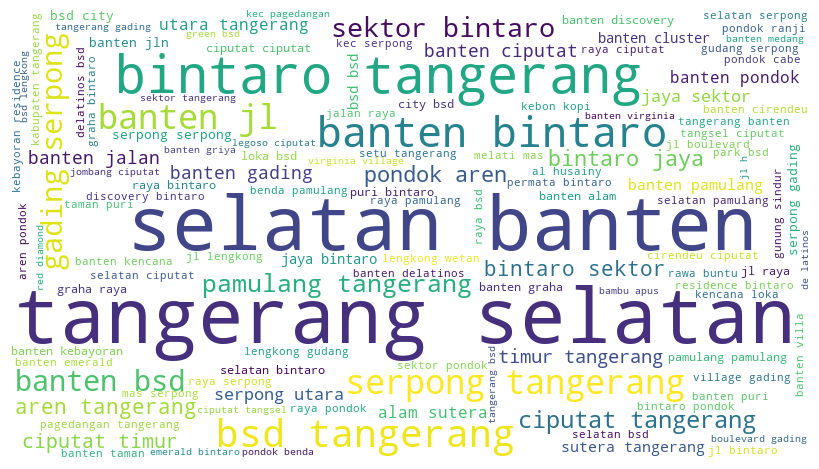

Top 25 words:
[('tangerang', 20061), ('selatan', 19765), ('banten', 19151), ('bintaro', 10450), ('bsd', 4877), ('serpong', 4741), ('ciputat', 2664), ('sektor', 2085), ('gading', 1938), ('pamulang', 1855), ('pondok', 1583), ('jl.', 1356), ('jaya', 1249), ('raya', 1233), ('aren', 1207), ('9', 1197), ('jl', 1107), ('timur', 1002), ('jalan', 837), ('sutera', 715), ('utara', 666), ('alam', 619), ('cluster', 497), ('city', 387), ('graha', 382)]


In [6]:
all_locations = " ".join(train_data['location'])
words = all_locations.replace(",", "").split()

wordcloud = WordCloud(width=800, height=450,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(" ".join(words))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

word_counts = Counter(words)
print("Top 25 words:")
print(word_counts.most_common(25))

These all have significant enough proportions, when compared to the sample size ( <30000). The first three, which are tangerang, selatan, and banten, are the geographical scope of this dataset anyways, so we can remove them (all houses in this dataset are in Tangerang Selatan, Banten). Hence, we are left with the array below, which I will use for OneHotEncoding.

In [8]:
RelevantLocationWords = ['bintaro', 'serpong', 'bsd', 'ciputat', 'sektor', 'gading', 'pamulang', 'pondok',
                         'jl.', 'raya','jaya','aren', '9','jl','timur','jalan','sutera','utara','alam',
                         'cluster','city','lengkong']

And now we do the same for url

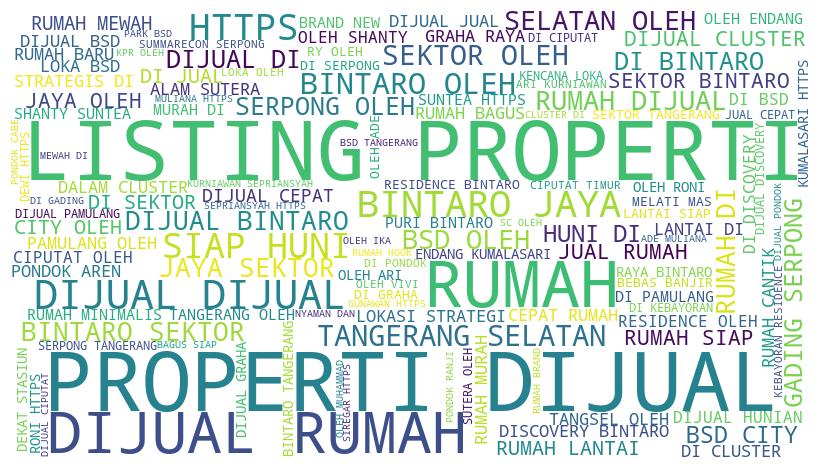

Top 30 words:
[('DIJUAL', 23684), ('PROPERTI', 18954), ('LISTING', 18951), ('HTTPS', 18948), ('WWW.RUMAH.COM', 18948), ('OLEH', 18948), ('RUMAH', 10641), ('DI', 7887), ('BINTARO', 7233), ('SEKTOR', 3517), ('BSD', 3390), ('JAYA', 2795), ('CLUSTER', 2637), ('SERPONG', 2584), ('SIAP', 2547), ('HUNI', 2496), ('TANGERANG', 1958), ('9', 1912), ('2', 1887), ('SELATAN', 1689), ('LANTAI', 1686), ('DEKAT', 1463), ('JUAL', 1150), ('GADING', 1092), ('MURAH', 1047), ('CITY', 1034), ('STRATEGIS', 1011), ('PAMULANG', 975), ('CIPUTAT', 952), ('RESIDENCE', 947)]


In [10]:
train_data['url'] = train_data['url'].astype(str)
test_data['url'] = test_data['url'].astype(str)

all_urls = " ".join(train_data['url'])

# Replace slashes, colons, and dashes with spaces
all_urls = all_urls.replace(":", " ").replace("/", " ").replace("-", " ")

# Convert to uppercase (so that it won't be confused with our previous features) and split into words
words = all_urls.upper().split()

wordcloud = WordCloud(width=800, height=450,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(" ".join(words))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

word_counts = Counter(words)
print("Top 30 words:")
print(word_counts.most_common(30))

A lot of these words actually represent the location of the house, just like the previous features we created (a lot have the same name anyways). However, I'd like to still observe these since these may or may not be a better predictor than the inputted location. I'd like to exclude words with a higher frequency of appearing than 'DI', since all of these words are generic, and/or are a part of every single url.
This leaves us with:

In [12]:
RelevantUrlWords = ['BINTARO','SEKTOR', 'BSD', 'JAYA', 'CLUSTER', 'SERPONG', 'SIAP', 'HUNI', '9','2', 
                    'LANTAI', 'DEKAT', 'GADING', 'MURAH', 'CITY', 'STRATEGIS','PAMULANG',  'CIPUTAT', 'RESIDENCE']

Feature Engineering - OneHotEncoding

In [14]:
for word in RelevantLocationWords:
    train_data[word] = train_data['location'].str.lower().str.contains(word).astype(int)

for word in RelevantUrlWords:
    train_data[word] = train_data['url'].str.upper().str.contains(word).astype(int)

train_data = train_data.drop(columns = ['url', 'location'])
train_data.head()

,bed,bath,area,price,bintaro,serpong,bsd,ciputat,sektor,gading,...,2,LANTAI,DEKAT,GADING,MURAH,CITY,STRATEGIS,PAMULANG,CIPUTAT,RESIDENCE
0,3.0,2.0,200,4.800000e+09,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,4.0,4.0,200,2.700000e+09,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,4.0,3.0,110,1.375000e+09,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
3,5.0,5.0,232,4.250000e+09,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,7.0,5.0,540,5.500000e+09,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Feature Selection

In [16]:
r2coeffs = {}

y = np.array(train_data.price)
for col in train_data.columns:
    x = np.array(train_data[col])
    r = np.corrcoef(x,y)
    rsquared = r[0][1]**2
    r2coeffs[col] = rsquared

r2coeffs = sorted(r2coeffs.items(), key = lambda x:x[1])
r2coeffs

[('CLUSTER', 1.5799141928140192e-05),
 ('gading', 3.282031485986558e-05),
 ('GADING', 8.143307946001392e-05),
 ('cluster', 8.662505251493457e-05),
 ('lengkong', 0.0001224920120572489),
 ('RESIDENCE', 0.00018429279678140498),
 ('SIAP', 0.0007047847113367169),
 ('timur', 0.0008031805987584832),
 ('utara', 0.0008677837092389469),
 ('city', 0.001054500537435903),
 ('2', 0.0015241399213137812),
 ('HUNI', 0.0015773165864280071),
 ('STRATEGIS', 0.0017378383284774965),
 ('9', 0.002158991798767152),
 ('aren', 0.0034426385234228593),
 ('jalan', 0.004112730674385828),
 ('CITY', 0.005148873551194749),
 ('pondok', 0.005837559203258146),
 ('CIPUTAT', 0.006242558446835433),
 ('bsd', 0.008106663928315085),
 ('jaya', 0.008231690602022572),
 ('BSD', 0.009515145714942164),
 ('serpong', 0.009606835959912807),
 ('alam', 0.010450023296652384),
 ('LANTAI', 0.010813719313144302),
 ('sutera', 0.010892012282329453),
 ('SERPONG', 0.011272871342666909),
 ('DEKAT', 0.012492178447131946),
 ('MURAH', 0.0136804582064

To reduce the dimensions in our model, as a way to reduce overfitting, I'll be excluding all variables that have R^2 values of less than 0.005. In the list printed above, this means that every word above 'CITY' will be excluded.

In [18]:
WeakCorrelatedCols = ['CLUSTER', 'gading', 'GADING', 'CLUSTER', 'lengkong', 'RESIDENCE', 'SIAP', 'timur', 'utara', 'city', '2', 
                      'HUNI', 'STRATEGIS', '9', 'aren', 'jalan']

train_data = train_data.drop(columns = WeakCorrelatedCols)
print(train_data.columns)
train_data.head()

Index(['bed', 'bath', 'area', 'price', 'bintaro', 'serpong', 'bsd', 'ciputat',
       'sektor', 'pamulang', 'pondok', 'jl.', 'raya', 'jaya', 'jl', 'sutera',
       'alam', 'cluster', 'BINTARO', 'SEKTOR', 'BSD', 'JAYA', 'SERPONG',
       'LANTAI', 'DEKAT', 'MURAH', 'CITY', 'PAMULANG', 'CIPUTAT'],
      dtype='object')


,bed,bath,area,price,bintaro,serpong,bsd,ciputat,sektor,pamulang,...,SEKTOR,BSD,JAYA,SERPONG,LANTAI,DEKAT,MURAH,CITY,PAMULANG,CIPUTAT
0,3.0,2.0,200,4.800000e+09,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,4.0,4.0,200,2.700000e+09,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,4.0,3.0,110,1.375000e+09,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,5.0,5.0,232,4.250000e+09,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,5.0,540,5.500000e+09,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


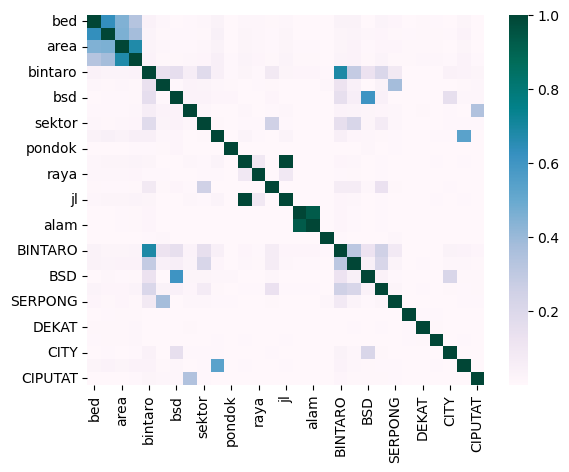

In [19]:
#let's plot the cross correlation values now
sns.heatmap(train_data.corr(numeric_only = True)**2, cmap = "PuBuGn")
plt.show()

In [20]:
#alam and sutera, and jl and jl. are very highly cross-correlated. we can remove alam since it has less of an R^2 value than sutera.
train_data = train_data.drop(columns = ['alam', 'jl.'])
train_data.head()

,bed,bath,area,price,bintaro,serpong,bsd,ciputat,sektor,pamulang,...,SEKTOR,BSD,JAYA,SERPONG,LANTAI,DEKAT,MURAH,CITY,PAMULANG,CIPUTAT
0,3.0,2.0,200,4.800000e+09,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,4.0,4.0,200,2.700000e+09,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,4.0,3.0,110,1.375000e+09,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,5.0,5.0,232,4.250000e+09,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,5.0,540,5.500000e+09,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Feature selection is done with training data. Now we use the same list of features for test data.

In [22]:
URLFeatures = ['BINTARO', 'SEKTOR', 'BSD', 'JAYA', 'SERPONG', 'LANTAI', 'DEKAT', 'MURAH', 'CITY', 'PAMULANG', 'CIPUTAT']
LocationFeatures = ['bintaro', 'serpong', 'bsd', 'ciputat', 'sektor', 'pamulang', 'pondok', 'raya', 'jaya', 'jl', 'sutera', 'cluster']

for word in LocationFeatures:
    test_data[word] = test_data['location'].str.lower().str.contains(word).astype(int)
    
for word in URLFeatures:
    test_data[word] = test_data['url'].str.upper().str.contains(word).astype(int)

test_data = test_data.drop(columns = ['url', 'location'])
test_data.head()

,bed,bath,area,price,bintaro,serpong,bsd,ciputat,sektor,pamulang,...,SEKTOR,BSD,JAYA,SERPONG,LANTAI,DEKAT,MURAH,CITY,PAMULANG,CIPUTAT
0,3.0,2.0,200,4.800000e+09,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,4.0,4.0,200,2.700000e+09,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,4.0,3.0,110,1.375000e+09,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,5.0,5.0,232,4.250000e+09,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,5.0,540,5.500000e+09,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train_data.to_csv('train_data_cleaned_with_features.csv', index = False)
test_data.to_csv('test_data_cleaned_with_features.csv', index = False)